In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import ABIDEParser as Reader
# Get class labels
subject_IDs = Reader.get_ids()
labels = Reader.get_subject_score(subject_IDs, score='DX_GROUP')

# Get acquisition site
sites = Reader.get_subject_score(subject_IDs, score='SITE_ID')
unique = np.unique(list(sites.values())).tolist()

num_classes = 2
num_nodes = len(subject_IDs)

# Initialise variables for class labels and acquisition sites
y_data = np.zeros([num_nodes, num_classes])
y = np.zeros([num_nodes, 1])
site = np.zeros([num_nodes, 1], dtype=int)

# Get class labels and acquisition site for all subjects
for i in range(num_nodes):
    y_data[i, int(labels[subject_IDs[i]])-1] = 1
    y[i] = int(labels[subject_IDs[i]])
    site[i] = unique.index(sites[subject_IDs[i]])
features = Reader.get_networks(subject_IDs, kind='correlation', atlas_name='ho')
# x_train , x_test, y_train, y_test = train_test_split(features,y,train_size=0.8)
# from sklearn.utils.validation import column_or_1d
# y_train=column_or_1d(y_train, warn=True)


c:\PFA\population-gcn2\ABIDEParser.py:227: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in all_networks]


In [5]:
y2=y.flatten()
y2=y2-1

In [6]:
x_train , x_test, y_train, y_test = train_test_split(features,y2,train_size=0.8)

(111*111-111)/2=6105

In [6]:
x_train.shape

(696, 6105)

In [7]:
x_train

array([[ 1.21878907,  1.00119769,  0.9606183 , ...,  0.56900143,
         0.27248423,  1.09996313],
       [ 0.1994564 ,  0.48966274,  0.37904112, ...,  0.1699608 ,
         0.17680961,  0.88194105],
       [ 0.81115533,  1.23116123,  0.92553344, ...,  0.112454  ,
         0.32957016,  0.74994678],
       ...,
       [ 0.63390321,  0.71276936,  0.63378263, ..., -0.11389613,
         0.08091393,  0.73405796],
       [ 0.44375229,  0.93921295,  0.77304098, ...,  0.15596744,
         0.22584574,  0.90776786],
       [ 0.50109194,  0.7896569 ,  0.99859639, ...,  0.51953354,
         0.34342458,  1.32090568]])

specificité et sensitivité
recall = TP/(TP+FN) = sensitivity = TPR <br/>
FPR = FP/(FP+TN) <br/>
specificity = 1 - FPR

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [49]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\Users\ousem\.virtualenvs\population-gcn2-YZL6I4UQ\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lr.score(x_train,y_train)

1.0

In [50]:


y_pred_lr = lr.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred_lr)

0.6342857142857142

In [33]:
def sensitivity_specificity(confusion_ma):
  ss = {}
  ss['sensitivity']=confusion_ma[0,0]/(confusion_ma[0,0]+confusion_ma[0,1])
  fpr = confusion_ma[1,0]/(confusion_ma[1,0]+confusion_ma[1,1])
  ss['specificity']=1-fpr
  return ss

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

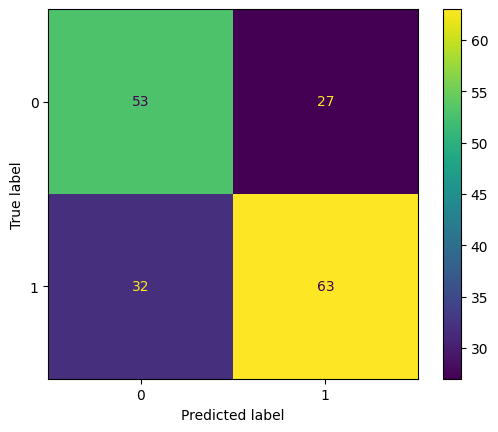

In [35]:
cm = confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [36]:
sensitivity_specificity(cm)

{'sensitivity': 0.6625, 'specificity': 0.6631578947368422}

propabilité de l'appartenance a la class 0 (!exited) et class 1(exited)

In [37]:
y_pred_proba_lr = lr.predict_proba(x_test)

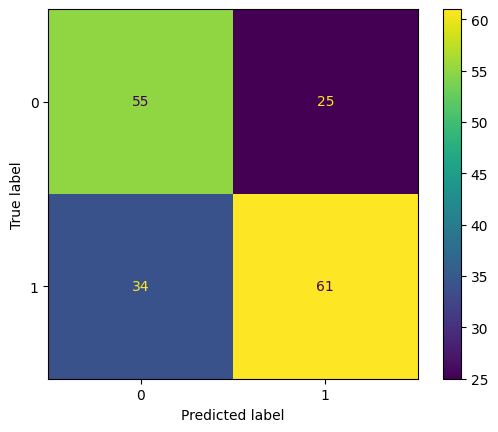

In [38]:
y_pred_with_threshold_lr = (y_pred_proba_lr[:,1] >= 0.6).astype(int)
cm = confusion_matrix(y_test,y_pred_with_threshold_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [39]:
sensitivity_specificity(confusion_matrix(y_test,y_pred_with_threshold_lr))

{'sensitivity': 0.6875, 'specificity': 0.6421052631578947}

In [40]:
from sklearn.metrics import roc_curve

In [41]:
y_pred_proba_lr

array([[4.24193504e-02, 9.57580650e-01],
       [8.04205397e-01, 1.95794603e-01],
       [1.64260487e-02, 9.83573951e-01],
       [9.31554453e-03, 9.90684455e-01],
       [9.90292734e-02, 9.00970727e-01],
       [9.13648712e-01, 8.63512876e-02],
       [9.99412884e-01, 5.87115579e-04],
       [9.98612222e-01, 1.38777839e-03],
       [6.01336134e-01, 3.98663866e-01],
       [9.96603742e-01, 3.39625784e-03],
       [9.99697600e-01, 3.02399556e-04],
       [9.54652286e-01, 4.53477141e-02],
       [9.54454819e-01, 4.55451811e-02],
       [1.33904501e-01, 8.66095499e-01],
       [9.99004719e-01, 9.95281356e-04],
       [3.39674437e-04, 9.99660326e-01],
       [9.74611515e-01, 2.53884855e-02],
       [4.10143860e-01, 5.89856140e-01],
       [1.23598890e-01, 8.76401110e-01],
       [9.76917841e-01, 2.30821585e-02],
       [7.48106713e-04, 9.99251893e-01],
       [4.74516981e-01, 5.25483019e-01],
       [9.99781080e-01, 2.18919934e-04],
       [9.52257983e-01, 4.77420170e-02],
       [9.460423

In [42]:
fpr_lr, tpr_lr, th_lr = roc_curve(y_test,  y_pred_proba_lr[:,1])

In [43]:
from sklearn.metrics import roc_auc_score

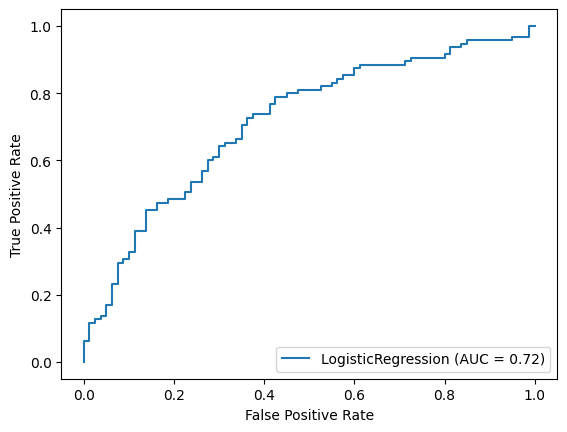

In [44]:
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

AUC calculer l'air au dessous du courbe

In [76]:
roc_auc_score(y_test,  y_pred_proba_lr[:,1])

0.761646803900325

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [79]:
knn.score(x_train,y_train)

0.7241379310344828

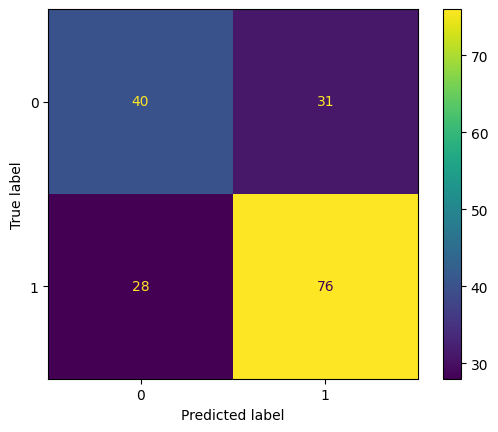

In [80]:
cm = confusion_matrix(y_test,y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [81]:
sensitivity_specificity(cm)

{'sensitivity': 0.5633802816901409, 'specificity': 0.7307692307692308}

In [82]:
y_pred_proba_knn = knn.predict_proba(x_test)
fpr_knn, tpr_knn, th_knn = roc_curve(y_test,  y_pred_proba_knn[:,1])

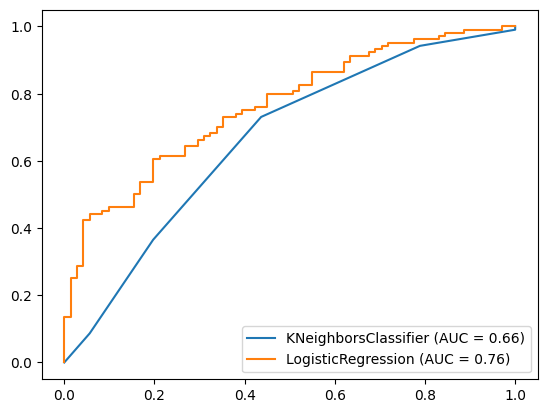

In [83]:
plt.plot(fpr_knn,tpr_knn,label=knn.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [84]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_neighbors': 8}
0.563268242548818


In [86]:
knn_8 = KNeighborsClassifier(n_neighbors=8).fit(x_train,y_train)
y_pred_proba_knn_8=knn_8.predict_proba(x_test)

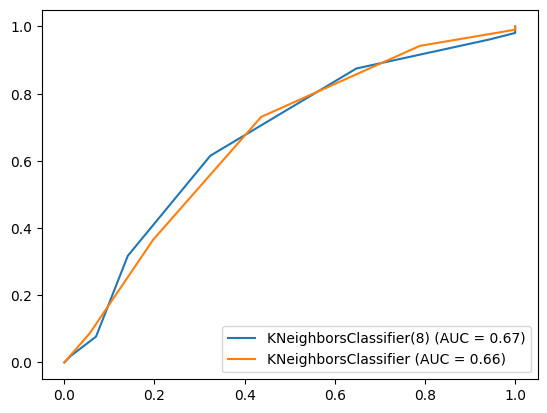

In [87]:

fpr_knn_8,tpr_knn_8,th_knn_8=roc_curve(y_test,y_pred_proba_knn_8[:,1])
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_knn,tpr_knn,label=knn.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

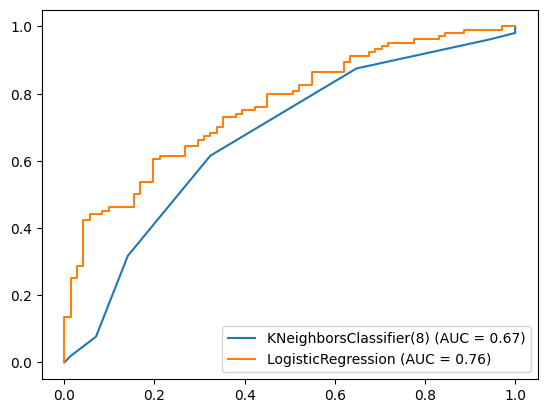

In [89]:
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [90]:
from sklearn.svm import SVC

In [91]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svc)

0.6857142857142857

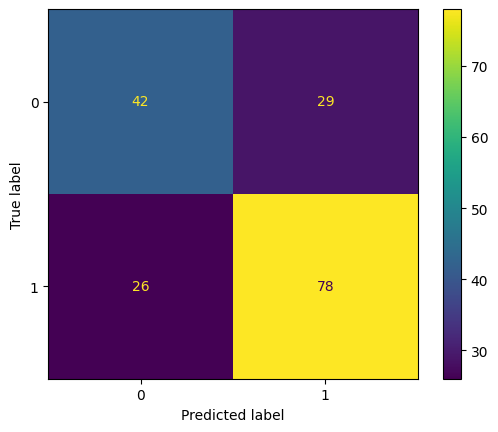

In [93]:
cm=confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [94]:
sensitivity_specificity(cm)

{'sensitivity': 0.5915492957746479, 'specificity': 0.75}

In [95]:
svc_rbf = SVC(kernel="rbf",probability=True)
svc_rbf.fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)

In [96]:
accuracy_score(y_test,y_pred_svc_rbf)

0.6914285714285714

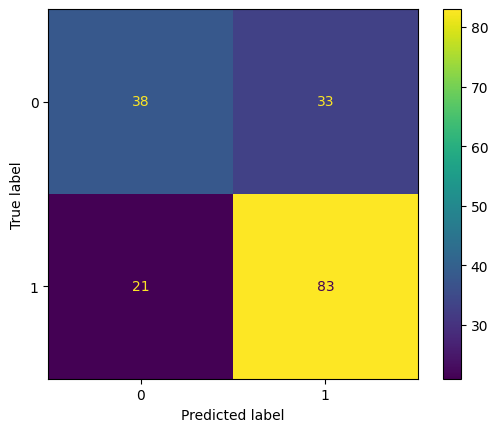

In [97]:
cm=confusion_matrix(y_test,y_pred_svc_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [98]:
sensitivity_specificity(cm)

{'sensitivity': 0.5352112676056338, 'specificity': 0.7980769230769231}

In [99]:
y_pred_proba_svc_rbf = svc_rbf.predict_proba(x_test)
fpr_svc_rbf, tpr_svc_rbf, th_svc_rbf = roc_curve(y_test,  y_pred_proba_svc_rbf[:,1])

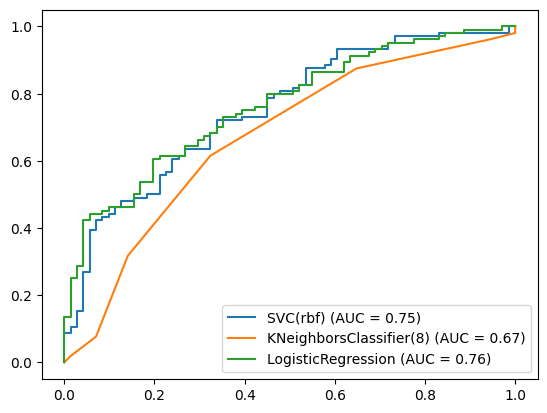

In [101]:
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
accuracy_score(y_test,y_pred_dtc)

0.5485714285714286

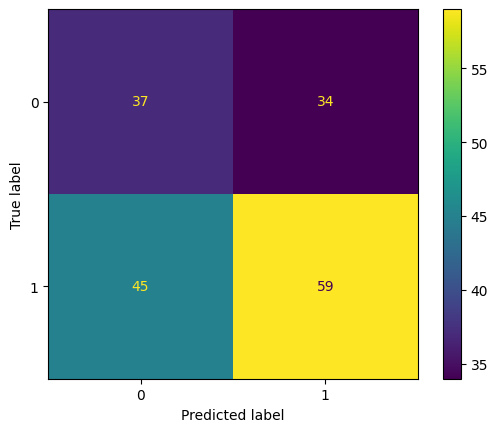

In [104]:
cm=confusion_matrix(y_test,y_pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [105]:
sensitivity_specificity(cm)

{'sensitivity': 0.5211267605633803, 'specificity': 0.5673076923076923}

In [106]:
y_pred_proba_dtc = dtc.predict_proba(x_test)
fpr_dtc, tpr_dtc, th_dtc = roc_curve(y_test,  y_pred_proba_dtc[:,1])

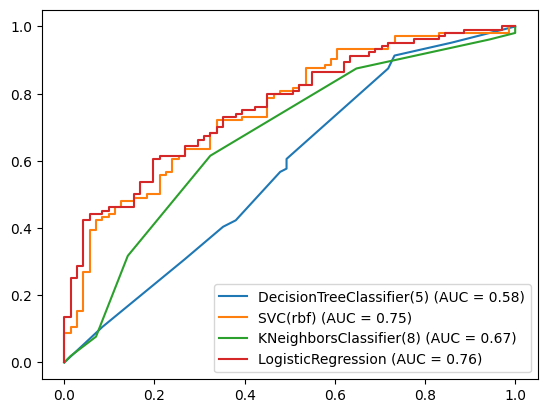

In [108]:
plt.plot(fpr_dtc,tpr_dtc,label=dtc.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_dtc[:,1]),2))+")")
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

Transformer le fichier dot generer par la methode export_graphviz ver un fichier pdf :
https://drive.google.com/file/d/1-zg_ulxCk9mmN3RzuipcA4qJK4RIescf/view?usp=sharing

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier(500)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
accuracy_score(y_test,y_pred_rfc)

0.6514285714285715

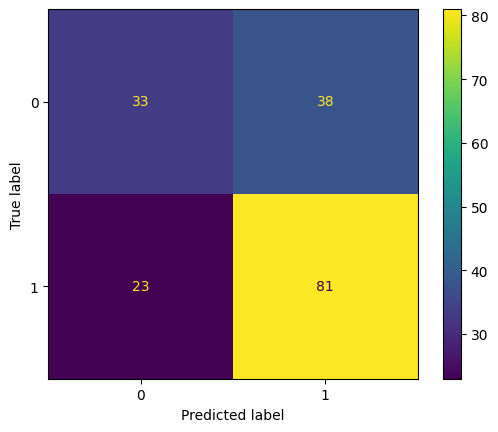

In [111]:
cm=confusion_matrix(y_test,y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [112]:
sensitivity_specificity(cm)

{'sensitivity': 0.4647887323943662, 'specificity': 0.7788461538461539}

In [113]:
y_pred_proba_rfc = rfc.predict_proba(x_test)
fpr_rfc, tpr_rfc, th_rfc = roc_curve(y_test,  y_pred_proba_rfc[:,1])

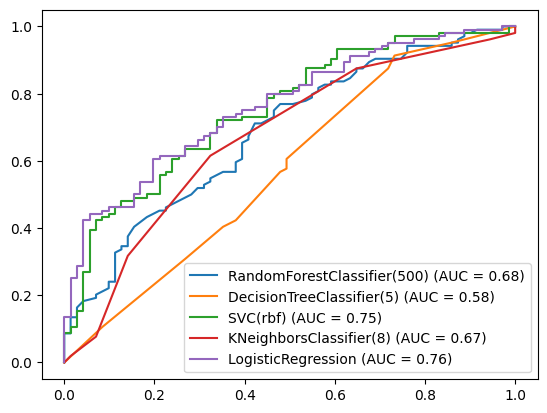

In [115]:
plt.plot(fpr_rfc,tpr_rfc,label=rfc.__class__.__name__+"(500) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_rfc[:,1]),2))+")")
plt.plot(fpr_dtc,tpr_dtc,label=dtc.__class__.__name__+"(5) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_dtc[:,1]),2))+")")
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label=svc_rbf.__class__.__name__+"(rbf) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_svc_rbf[:,1]),2))+")")
plt.plot(fpr_knn_8,tpr_knn_8,label=knn_8.__class__.__name__+"(8) (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_knn_8[:,1]),2))+")")
plt.plot(fpr_lr,tpr_lr,label=lr.__class__.__name__+" (AUC = "+str(round(roc_auc_score(y_test,  y_pred_proba_lr[:,1]),2))+")")
plt.legend(loc='lower right')
plt.show()

In [10]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
accuracy_score(y_test,y_pred_ridge)

0.6114285714285714

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
y_pred


array([1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1.])

In [20]:
accuracy_score(y_test,y_pred)

0.5771428571428572

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(x_train, y_train).predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0.])

In [22]:
accuracy_score(y_test,y_pred)

0.6285714285714286